Uyen Huynh

# Crash Data from Town of Cary, North Carolina

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
original_data = pd.read_csv("../data/cpd-crash-incidents-2022.csv", sep=";")

In [3]:
original_data.head()

,tamainid,Location_Description,Road_Feature,Road_Character,Road_Class,Road_Configuration,Road_Surface,Road_Conditions,Light_Condition,Weather,Traffic_Control,lat,lon,lon2,lat2,tract,Beat,Fatality,Injury,NumPassengers,NumPedestrians,Contributing_Factor_1,Contributing_Factor_2,Contributing_Factor_3,Contributing_Factor_4,Vehicle1,Vehicle2,Vehicle3,Vehicle4,Vehicle5,Work Area,Records,TA_Date,TA_Time,Crash_Date,Geo_Location,year,Fatalities,Injuries,Month,contrfact1,contrfact2,Contributing Factor,vehicleconcat1,vehicleconcat2,vehicleconcat3,Vehicle Type
0,48491,50 FEET FROM SR 7119 (OKELLY CHAPEL RD),RELATED TO INTERSECTION,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,STOP AND GO SIGNAL,35.845768,-78.890778,-78.890454,35.845969,P091,119.0,0,0,NaN,NaN,NONE,NaN,NONE,NaN,VAN,PASSENGER CAR,NaN,NaN,NaN,NO,20002,2021-07-29,1:22:09 PM,2021-07-29T13:22:09-04:00,"35.845768402,-78.89077828",2021,No,No,7,NONE,"NONE,NONE","NONE,NONE","VAN,PASSENGER CAR","VAN,PASSENGER CAR","VAN,PASSENGER CAR","VAN,PASSENGER CAR"
1,48503,CARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20014,2021-07-30,9:59:04 PM,2021-07-30T21:59:04-04:00,NaN,2021,No,No,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48504,100 FEET FROM SR 1009 (TRYON RD),NO SPECIAL FEATURE,"CURVE,GRADE",STATE SECONDARY ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,NO CONTROL PRESENT,NaN,NaN,-78.789427,35.736288,NaN,NaN,0,2,1.0,NaN,NONE,NaN,NONE,NaN,SPORT UTILITY,SPORT UTILITY,NaN,NaN,NaN,NO,20015,2021-07-30,6:27:15 PM,2021-07-30T18:27:15-04:00,NaN,2021,No,Yes,7,NONE,"NONE,NONE","NONE,NONE","SPORT UTILITY,SPORT UTILITY","SPORT UTILITY,SPORT UTILITY","SPORT UTILITY,SPORT UTILITY","SPORT UTILITY,SPORT UTILITY"
3,48512,0 FEET FROM SR 1305 (ARTHUR PIERCE RD),T-INTERSECTION,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,STOP SIGN,NaN,NaN,-78.791558,35.696910,NaN,NaN,0,1,1.0,NaN,NONE,NaN,NONE,NaN,SPORT UTILITY,PASSENGER CAR,NaN,NaN,NaN,NO,20023,2021-07-31,2:02:47 AM,2021-07-31T02:02:47-04:00,NaN,2021,No,Yes,7,NONE,"NONE,NONE","NONE,NONE","SPORT UTILITY,PASSENGER CAR","SPORT UTILITY,PASSENGER CAR","SPORT UTILITY,PASSENGER CAR","SPORT UTILITY,PASSENGER CAR"
4,48513,.25 MILES FROM SR 5808 (E CHATHAM ST),"DRIVEWAY, PUBLIC","STRAIGHT,LEVEL",LOCAL STREET,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLOUDY,STOP SIGN,NaN,NaN,-78.759864,35.791459,NaN,120.0,0,0,1.0,NaN,NONE,NaN,NONE,NaN,PASSENGER CAR,SPORT UTILITY,NaN,NaN,NaN,NO,20024,2021-08-01,11:57 AM,2021-08-01T11:57:00-04:00,NaN,2021,No,No,8,NONE,"NONE,NONE","NONE,NONE","PASSENGER CAR,SPORT UTILITY","PASSENGER CAR,SPORT UTILITY","PASSENGER CAR,SPORT UTILITY","PASSENGER CAR,SPORT UTILITY"


In [4]:
print(f'There are {len(original_data)} records of indicents.')

There are 22513 records of indicents.


In [5]:
original_data.columns

Index(['tamainid', 'Location_Description', 'Road_Feature', 'Road_Character',
       'Road_Class', 'Road_Configuration', 'Road_Surface', 'Road_Conditions',
       'Light_Condition', 'Weather', 'Traffic_Control', 'lat', 'lon', 'lon2',
       'lat2', 'tract', 'Beat', 'Fatality', 'Injury', 'NumPassengers',
       'NumPedestrians', 'Contributing_Factor_1', 'Contributing_Factor_2',
       'Contributing_Factor_3', 'Contributing_Factor_4', 'Vehicle1',
       'Vehicle2', 'Vehicle3', 'Vehicle4', 'Vehicle5', 'Work Area', 'Records',
       'TA_Date', 'TA_Time', 'Crash_Date', 'Geo_Location', 'year',
       'Fatalities', 'Injuries', 'Month', 'contrfact1', 'contrfact2',
       'Contributing Factor', 'vehicleconcat1', 'vehicleconcat2',
       'vehicleconcat3', 'Vehicle Type'],
      dtype='object')

### Merge duplicated columns showing lat & lon which corresponds to the location of the crash.

In [6]:
original_data[['lat', 'lon', 'lat2', 'lon2', 'Geo_Location']].tail(10)

,lat,lon,lat2,lon2,Geo_Location
22503,35.973047,-78.674481,35.843600,-78.886000,"35.973047186,-78.67448141"
22504,35.765984,-78.783606,35.765513,-78.783283,"35.765984299,-78.7836056"
22505,NaN,NaN,35.758050,-78.783077,NaN
22506,NaN,NaN,35.736283,-78.787799,NaN
22507,NaN,NaN,35.737967,-78.794655,NaN
22508,NaN,NaN,35.758189,-78.783184,NaN
22509,NaN,NaN,35.762013,-78.748459,NaN
22510,NaN,NaN,35.753321,-78.731095,NaN
22511,NaN,NaN,35.705004,-78.794510,NaN
22512,35.790917,-78.827138,35.790523,-78.826956,"35.790916978,-78.82713802"


In [7]:
def isnan(x):
    return x != x

def merge_lat(x):
    lat = x['lat']
    if isnan(lat):
        if not isnan(x['lat2']):
            lat = x['lat2']
        elif not isnan(x['Geo_Location']):
            lat = x['Geo_Location'].split(',')[0]
    return lat

def merge_lon(x):
    lon = x['lon']
    if isnan(lon):
        lon = x['lon2']
    elif not isnan(x['Geo_Location']):
        lon = x['Geo_Location'].split(',')[1]
    return lon

print(f"# NaN values in the original 'lat' column : {original_data['lat'].isna().sum()}.")
original_data['latitude'] = original_data.apply(merge_lat, axis=1)
print(f"# NaN values in the 'latitude' column after filling values: {original_data['latitude'].isna().sum()}.")

print(f"# NaN values in the original 'lon' column : {original_data['lon'].isna().sum()}.")
original_data['longitude'] = original_data.apply(merge_lon, axis=1)
print(f"# NaN values in the 'longitude' column after filling values: {original_data['longitude'].isna().sum()}.")

# NaN values in the original 'lat' column : 17464.
# NaN values in the 'latitude' column after filling values: 542.
# NaN values in the original 'lon' column : 17464.
# NaN values in the 'longitude' column after filling values: 532.


In [8]:
# Remove 'lat', 'lon', 'lat2', 'lon2', 'Geo_Location'
data = original_data.copy().drop(columns=['lat', 'lon', 'lat2', 'lon2', 'Geo_Location'])

### Handle columns containing info about vehicles

In [9]:
vehicle_cols_remove = [x for x in data.columns if 'veh' in x]
vehicle_cols_remove.append('Vehicle Type')
vehicle_cols_remove

['vehicleconcat1', 'vehicleconcat2', 'vehicleconcat3', 'Vehicle Type']

In [10]:
# Remove duplicated columns about vehicle types
data = data.drop(columns=vehicle_cols_remove)

### Handle columns about contributing factor

In [11]:
factor_cols = [x for x in data.columns if 'Factor' in x or 'fact' in x]
factor_cols

['Contributing_Factor_1',
 'Contributing_Factor_2',
 'Contributing_Factor_3',
 'Contributing_Factor_4',
 'contrfact1',
 'contrfact2',
 'Contributing Factor']

In [12]:
# Remove 3 columns: 'contrfact1', 'contrfact2', 'Contributing Factor'
data = data.drop(columns=['contrfact1', 'contrfact2'])

In [13]:
data.head(3)

,tamainid,Location_Description,Road_Feature,Road_Character,Road_Class,Road_Configuration,Road_Surface,Road_Conditions,Light_Condition,Weather,Traffic_Control,tract,Beat,Fatality,Injury,NumPassengers,NumPedestrians,Contributing_Factor_1,Contributing_Factor_2,Contributing_Factor_3,Contributing_Factor_4,Vehicle1,Vehicle2,Vehicle3,Vehicle4,Vehicle5,Work Area,Records,TA_Date,TA_Time,Crash_Date,year,Fatalities,Injuries,Month,Contributing Factor,latitude,longitude
0,48491,50 FEET FROM SR 7119 (OKELLY CHAPEL RD),RELATED TO INTERSECTION,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,STOP AND GO SIGNAL,P091,119.0,0,0,NaN,NaN,NONE,NaN,NONE,NaN,VAN,PASSENGER CAR,NaN,NaN,NaN,NO,20002,2021-07-29,1:22:09 PM,2021-07-29T13:22:09-04:00,2021,No,No,7,"NONE,NONE",35.845768,-78.89077828
1,48503,CARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20014,2021-07-30,9:59:04 PM,2021-07-30T21:59:04-04:00,2021,No,No,7,NaN,NaN,NaN
2,48504,100 FEET FROM SR 1009 (TRYON RD),NO SPECIAL FEATURE,"CURVE,GRADE",STATE SECONDARY ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,NO CONTROL PRESENT,NaN,NaN,0,2,1.0,NaN,NONE,NaN,NONE,NaN,SPORT UTILITY,SPORT UTILITY,NaN,NaN,NaN,NO,20015,2021-07-30,6:27:15 PM,2021-07-30T18:27:15-04:00,2021,No,Yes,7,"NONE,NONE",35.736288,-78.7894


In [14]:
crash = data.copy()
crash.rename({'Contributing Factor': 'Contributing_Factor'}, axis=1, inplace=True)

## Data Cleaning & Data Analysis

In [15]:
# function: convert NaN values into string 'None'
def na_convert_str(data, column):
    x = data[column]
    if isinstance(x, str):
        if x == 'UNKNOWN' or x == 'OTHER *':
            return 'NONE'
        else:
            return x
    else:
        return 'NONE'

## 1. Summary Statistics Information

In [16]:
crash['year'].value_counts()

2019    5035
2018    5024
2017    4731
2021    3992
2020    3196
2022     535
Name: year, dtype: int64

## 2. The most factors

In [17]:
def factor_clean(text):
    words = ['NONE,', ',NONE', 'NONE', 'UNKNOWN,', ',UNKNOWN', 'UNKNOWN', 'OTHER *,', ',OTHER *', 'OTHER *']
    for w in words:
        new_text = text.replace(w, '')
        text = new_text
    return new_text

In [18]:
crash['Contributing_Factor'] = crash.apply(na_convert_str, column='Contributing_Factor', axis=1)
crash['Contributing_Factor'] = crash['Contributing_Factor'].apply(factor_clean)

In [19]:
# top reasons why most crashes happened
crash['Contributing_Factor'].value_counts()

                                                                       22014
COMING FROM BEHIND PARKED VEHICLE                                        187
DARTING                                                                  125
FAILURE TO YIELD RIGHT OF WAY                                             80
LYING AND/OR ILLEGALLY IN ROADWAY                                         20
NOT VISIBLE (DARK CLOTHING,ETC.)                                          16
INATTENTIVE (TALKING,EATING,ETC.)                                         14
FAILURE TO OBEY TRAFFIC SIGNS,SIGNALS                                      9
COMING FROM BEHIND PARKED VEHICLE,COMING FROM BEHIND PARKED VEHICLE        8
WRONG SIDE OF ROAD                                                         8
FAILURE TO YIELD RIGHT OF WAY,FAILURE TO YIELD RIGHT OF WAY                5
DARTING,FAILURE TO YIELD RIGHT OF WAY                                      4
DARTING,DARTING                                                            3

In [20]:
# factors = ['COMING FROM BEHIND PARKED VEHICLE', 
#     'DARTING', 
#     'FAILURE TO YIELD RIGHT OF WAY', 
#     'LYING AND/OR ILLEGALLY IN ROADWAY', 
#     'NOT VISIBLE (DARK CLOTHING,ETC.)',
#     'INATTENTIVE (TALKING,EATING,ETC.)',
#     'FAILURE TO OBEY TRAFFIC SIGNS,SIGNALS',
#     'WRONG SIDE OF ROAD']

def factor_clean2(x):
    if 'ETC.' not in x:
        if ',' in x:
            lst = x.split(',')
            factor1 = lst[0]
            same = True
            for ele in lst:
                if ele != factor1:
                    same = False
                    break
            if same:
                return factor1
            elif not same:
                return x
        else:
            return x
    elif x == "INATTENTIVE (TALKING,EATING,ETC.),INATTENTIVE (TALKING,EATING,ETC.)":
        return "INATTENTIVE (TALKING,EATING,ETC.)"
    elif x == "INATTENTIVE (TALKING,EATING,ETC.)" or x == "NOT VISIBLE (DARK CLOTHING,ETC.)":
        return x
    elif x == "FAILURE TO YIELD RIGHT OF WAY,LYING AND/OR ILLEGALLY IN ROADWAY ":
        return "LYING AND/OR ILLEGALLY IN ROADWAY,FAILURE TO YIELD RIGHT OF WAY"
    elif x == "DARTING,NOT VISIBLE (DARK CLOTHING,ETC.)":
        return "NOT VISIBLE (DARK CLOTHING,ETC.),DARTING"
    elif x == "FAILURE TO YIELD RIGHT OF WAY,LYING AND/OR ILLEGALLY IN ROADWAY":
        return "LYING AND/OR ILLEGALLY IN ROADWAY,FAILURE TO YIELD RIGHT OF WAY"
    else:
        return x

crash['Contributing_Factor'] = crash['Contributing_Factor'].apply(factor_clean2)
crash['Contributing_Factor'].value_counts()


                                                                       22014
COMING FROM BEHIND PARKED VEHICLE                                        195
DARTING                                                                  128
FAILURE TO YIELD RIGHT OF WAY                                             85
LYING AND/OR ILLEGALLY IN ROADWAY                                         20
NOT VISIBLE (DARK CLOTHING,ETC.)                                          16
INATTENTIVE (TALKING,EATING,ETC.)                                         15
FAILURE TO OBEY TRAFFIC SIGNS,SIGNALS                                      9
WRONG SIDE OF ROAD                                                         8
DARTING,FAILURE TO YIELD RIGHT OF WAY                                      4
NOT VISIBLE (DARK CLOTHING,ETC.),DARTING                                   3
DARTING,FAILURE TO OBEY TRAFFIC SIGNS,SIGNALS                              2
WRONG SIDE OF ROAD,DARTING                                                 2

In [21]:
fac1 = crash['Contributing_Factor_1'].value_counts().reset_index().rename(columns={'index':'factor', 'Contributing_Factor_1':'count'})
fac2 = crash['Contributing_Factor_2'].value_counts().reset_index().rename(columns={'index':'factor', 'Contributing_Factor_2':'count'})
fac3 = crash['Contributing_Factor_3'].value_counts().reset_index().rename(columns={'index':'factor', 'Contributing_Factor_3':'count'})
fac4 = crash['Contributing_Factor_4'].value_counts().reset_index().rename(columns={'index':'factor', 'Contributing_Factor_4':'count'})

In [22]:
factors = pd.concat([fac1, fac2, fac3, fac4])
factors = factors.groupby('factor')['count'].sum().reset_index()
factors = factors[(factors['factor'] != 'NONE') & (factors['factor'] != 'UNKNOWN') & (factors['factor'] != 'OTHER *')]
total = factors['count'].sum()
factors['percentage'] = round(factors['count']/total*100, 1)
factors

,factor,count,percentage
0,COMING FROM BEHIND PARKED VEHICLE,205,38.0
1,DARTING,144,26.7
2,"FAILURE TO OBEY TRAFFIC SIGNS, SIGNALS",12,2.2
3,FAILURE TO YIELD RIGHT OF WAY,101,18.7
4,"INATTENTIVE (TALKING, EATING, ETC.)",18,3.3
5,LYING AND/OR ILLEGALLY IN ROADWAY,25,4.6
7,"NOT VISIBLE (DARK CLOTHING, ETC.)",23,4.3
10,WRONG SIDE OF ROAD,11,2.0


In [23]:
factors.to_csv('../data/factor_count.csv', index=False, sep=';')

## 3. Is there any specific time in a day when the majority of traffic accidents happen?

In [24]:
# 'Crash_Date': extract the hour when the crash happened
crash['Hour'] = crash['Crash_Date'].str[11:13]

In [25]:
hour_count = crash.groupby('Hour').Month.count()
hour_count = pd.DataFrame(hour_count)
hour_count.reset_index(inplace=True)
hour_count.columns = ['Hour', 'Total_Crashes']

[]

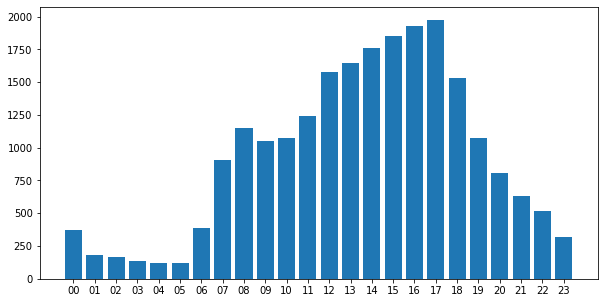

In [26]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.bar(hour_count['Hour'], hour_count['Total_Crashes'])
plt.plot()

### Hourly Fatality Rate 

In [27]:
hour_count = crash.groupby('Hour').Fatality.count()
hour_fatality = crash[crash['Fatalities'] == 'Yes'].groupby('Hour').Fatalities.count()
fat_rate = pd.concat([hour_count, hour_fatality], axis=1)
fat_rate.reset_index(inplace=True)
fat_rate.columns = ['Hour', 'Total_Crashes', 'Total_Fatality_Cases']
fat_rate['Total_Fatality_Cases'] = fat_rate['Total_Fatality_Cases'].fillna(0)
fat_rate['Fatality_Rate'] = fat_rate['Total_Fatality_Cases']/fat_rate['Total_Crashes']

In [28]:
fat_rate.to_csv('../data/fatality_rate_per_hour.csv', index=False)

### Hourly Injury Rate

In [29]:
hour_injury = crash[crash['Injuries'] == 'Yes'].groupby('Hour').Injuries.count()
inj_rate = pd.concat([hour_count, hour_injury], axis=1)
inj_rate.reset_index(inplace=True)
inj_rate.columns = ['Hour', 'Total_Crashes', 'Total_Injury_Cases']
inj_rate['Total_Injury_Cases'] = inj_rate['Total_Injury_Cases'].fillna(0)
inj_rate['Injury_Rate'] = inj_rate['Total_Injury_Cases']/fat_rate['Total_Crashes']

In [30]:
inj_rate.to_csv('../data/injury_rate_per_hour.csv', index=False)

### 4. Location_Description

In [31]:
count_per_location = crash['Location_Description'].value_counts().head(10)
danger_zone = count_per_location.index.to_list()
danger_zone

['CARY',
 '0 FEET FROM SR 1300 (KILDAIRE FARM RD)',
 '0 FEET FROM SR 1313 (WALNUT ST)',
 '1 MILES FROM US 1 HWY',
 '0 FEET FROM NC 55 HWY',
 '0 FEET FROM SR 1009 (TRYON RD)',
 '.5 MILES FROM US 1 HWY',
 '0 FEET FROM SR 1652 (N HARRISON AV)',
 '.2 MILES FROM US 1 HWY',
 '0 FEET FROM SR 1415 (SE MAYNARD RD)']

In [32]:
# def is_dangerous(x, danger=danger_zone):
#     if x in danger:
#         return True
#     else:
#         return False
# # condition = [crash['Location_Description'] in danger_zone]
# crash['danger'] = crash['Location_Description'].apply(is_dangerous)
# danger_df = crash[crash['danger']]
# danger_df['Road_Configuration'].value_counts()

In [33]:
# crash['Location_Description'] = crash.apply(na_convert_str, column='Location_Description', axis=1)
# a = crash['Location_Description'].str.lower().str.cat(sep=' ')

In [34]:
# def remove_number(text):
#     text_nonum = re.sub(r'\d+', '', text)
#     return text_nonum

In [35]:
# a = remove_number(a)

In [36]:
# from nltk.tokenize import RegexpTokenizer 
# tokenizer1 = RegexpTokenizer(r'\w+')
# tokens1 = tokenizer1.tokenize(a) 
# # recreate token list without stopwords
# from nltk.corpus import stopwords
# tokens1 = [token for token in tokens1 if token not in stopwords.words('english')]
# # count the word frequencies
# freq_dist1 = nltk.FreqDist(tokens1)
# # display and graph the word frequncies
# print(freq_dist1.most_common(50)) 

In [37]:
# remove_words = ['feet', 'sr', 'rd', 'miles', 'pva','p.v.a', 'p', 'us', 'rd', 'v', 'st', 'hwy', 'dr', 'pkwy', 'nc', 'n', 'se', 'blvd', 'nw', 'av', 'sw', 'ave', 'e', 'r', 'ct', 'ln', 'pl', 'w', 'from']
# tokens1 = [token for token in tokens1 if token not in remove_words]
# # count the word frequencies
# freq_dist1 = nltk.FreqDist(tokens1)
# # display and graph the word frequncies
# print(freq_dist1.most_common(50)) 
# freq_dist1.plot(20)

### 5. Vehicle - Weather

In [38]:
crash['Vehicle1'] = crash.apply(na_convert_str, column='Vehicle1', axis=1)
crash['Vehicle2'] = crash.apply(na_convert_str, column='Vehicle2', axis=1)
crash['Vehicle3'] = crash.apply(na_convert_str, column='Vehicle3', axis=1)
crash['Vehicle4'] = crash.apply(na_convert_str, column='Vehicle4', axis=1)
crash['Weather'] = crash.apply(na_convert_str, column='Weather', axis=1)

In [39]:
vehicles = crash[['Vehicle1','Vehicle2','Vehicle3','Vehicle4']]
vehicles = pd.melt(vehicles, value_vars=['Vehicle1','Vehicle2','Vehicle3','Vehicle4'])
vehicles.rename({'value':'Vehicle'}, axis=1, inplace=True)

In [40]:
truck_list = ['']
def vehicle_convert(s):
    x = s['Vehicle']
    if 'TRUCK' in x:
        return 'TRUCK'
    elif 'BUS' in x:
        return 'BUS'
    else:
        return x

In [41]:
vehicle_weather = crash[['Weather','Vehicle1','Vehicle2','Vehicle3','Vehicle4']]
vehicle_weather = pd.melt(vehicle_weather, id_vars=['Weather'], value_vars=['Vehicle1','Vehicle2','Vehicle3','Vehicle4'])
vehicle_weather = vehicle_weather.iloc[:,[0,2]]
vehicle_weather.rename({'value':'Vehicle'}, axis=1, inplace=True)
vehicle_weather['Vehicle'] = vehicles.apply(vehicle_convert, axis=1)

In [42]:
# vehicle_counts = vehicle_weather['New_Vehicle'].value_counts()
# vehicle_counts = pd.DataFrame(vehicle_counts)
# vehicle_counts.reset_index(inplace=True)
# vehicle_counts.columns = ['Vehicle', 'Number_of_Crashes']
# vehicle_counts = vehicle_counts[vehicle_counts['Vehicle'] != 'NONE']
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(vehicle_counts['Vehicle'], vehicle_counts['Number_of_Crashes'])
# ax.set_ylabel('Number of Crashes')
# ax.set_title('Number of crashes per type of vehicle ')
# plt.xticks(rotation = 90)
# plt.show()

In [43]:
# convert types of weather into only 2 types: GOOD and BAD
def weather_convert(s):
    if s == 'CLEAR':
        return 'GOOD'
    elif s == 'NONE':
        return s
    else:
        return 'BAD'

In [44]:
vehicle_weather['Weather_2types'] = vehicle_weather['Weather'].apply(weather_convert)

In [45]:
vehicle_weather.head(3)

,Weather,Vehicle,Weather_2types
0,CLEAR,VAN,GOOD
1,NONE,NONE,NONE
2,CLEAR,SPORT UTILITY,GOOD


In [46]:
vehicle_weather.to_csv('../data/vehicle_weather.csv', index=False)

## 6. Road_Configuration & Light_Condition

In [47]:
# investigate about the factor 'DARTING'
crash['Light_Condition'] = crash.apply(na_convert_str, column='Light_Condition', axis=1)
crash['Road_Configuration'] = crash.apply(na_convert_str, column='Road_Configuration', axis=1)

## 7. Number of cars involved

In [48]:
def count_cars(row):
    total = 0
    cols = ['Vehicle1', 'Vehicle2', 'Vehicle3', 'Vehicle4', 'Vehicle5']
    for c in cols:
        if not isnan(row[c]) and row[c] != 'NONE':
            total += 1
    return total

crash['num_vehicles'] = crash.apply(count_cars, axis=1)

In [49]:
count_per_light_numcars = crash.groupby(['num_vehicles', 'Light_Condition'])['tamainid'].count().reset_index()
count_per_light_numcars = count_per_light_numcars.rename(columns={'tamainid':'total_incidents'})
# count_per_light_numcars

count_per_numcars = count_per_light_numcars.groupby(['num_vehicles'])['total_incidents'].sum().reset_index()
count_per_numcars = count_per_numcars.rename(columns={'total_incidents':'sum_incidents'})
count_per_numcars

count_per_light_totalcars = pd.merge(count_per_light_numcars, count_per_numcars, how='inner', on='num_vehicles')

In [50]:
count_per_light_totalcars['rate'] = count_per_light_totalcars['total_incidents']/count_per_light_totalcars['sum_incidents']*100

### 8. Fatality rate per each pair of vehicles

In [51]:
cols = ['Vehicle1', 'Vehicle2', 'Fatalities']

In [52]:
test = crash[cols].copy()
test = test[(test['Vehicle1'] != 'NONE') & (test['Vehicle2'] != 'NONE')]
test['Fatalities'] = test['Fatalities'].apply(lambda x: 1 if x == 'Yes' else 0)
count_per_2vehs = test.groupby(['Vehicle1', 'Vehicle2'])['Fatalities'].count().reset_index()
count_per_2vehs.rename(columns={'Fatalities':'total_records'}, inplace=True)

In [53]:
total_fatalities_per_2vehs = test.groupby(['Vehicle1', 'Vehicle2'])['Fatalities'].sum().reset_index()
total_fatalities_per_2vehs.rename(columns={'Fatalities':'total_fatalities'}, inplace=True)

In [54]:
merge = pd.merge(count_per_2vehs, total_fatalities_per_2vehs, how='inner', on=['Vehicle1', 'Vehicle2'])

In [55]:
merge['fatality_rate'] = merge['total_fatalities']/merge['total_records']*100

In [56]:
fatality_rate_per_pairofvehicles = merge[merge['fatality_rate'] > 0]

In [57]:
fatality_rate_per_pairofvehicles.to_csv('../data/fatality_rate_per_pairofvehicles.csv', index=False)

## 9. Export the cleaned dataset 

In [58]:
crash.to_csv('../data/data_clean.csv', index=False, sep=';')